In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [3]:
data = pd.read_csv(r"C:\ict\Activities\week 10\employee.csv")
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

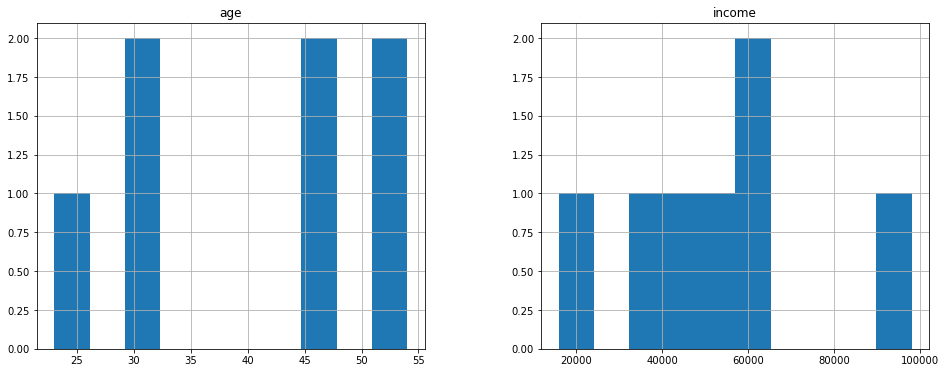

In [6]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(16,6))
plt.show()

# 2. Reset the index as "name" as the index

In [7]:
data = pd.read_csv(r'C:\ict\Activities\week 10\employee.csv',index_col='name')

In [8]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [9]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [10]:
data[data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [11]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [12]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [13]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [14]:
# replacing the missing values with median
data['age']=data['age'].fillna(data['age'].median())
data['age']

name
Allen Smith      45.0
S Kumar          45.0
Jack Morgan      32.0
Ying Chin        45.0
Dheeraj Patel    30.0
Satyam Sharma    45.0
James Authur     54.0
Josh Wills       54.0
Leo Duck         23.0
Name: age, dtype: float64

In [15]:
data.isna().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [16]:
# replacing the missing values with mean
data['income']=data['income'].fillna(data['income'].mean())
data.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [17]:
import statistics as st

In [18]:
mode_gender = st.mode(data['gender'])
mode_gender

'F'

In [19]:
# filling the missing values with mode
data['gender'] = data['gender'].fillna(mode_gender)
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

In [20]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

Text(0.5, 1.0, 'Box plot of age')

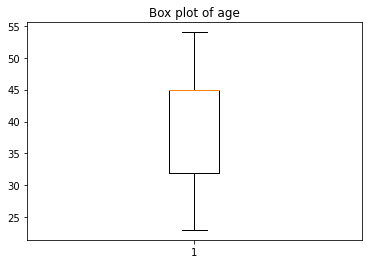

In [21]:
#to check whether outliers are present in the dataset we will plot box plots 
#checking 'age' column
plt.boxplot(data['age'])
plt.title('Box plot of age')

In [ ]:
# No outliers in 'age'.

Text(0.5, 1.0, 'Box plot of income')

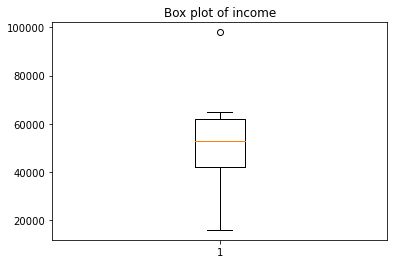

In [22]:
# checking 'income' column
plt.boxplot(data['income'])
plt.title('Box plot of income')

Text(0.5, 1.0, 'Box plot of performance_score')

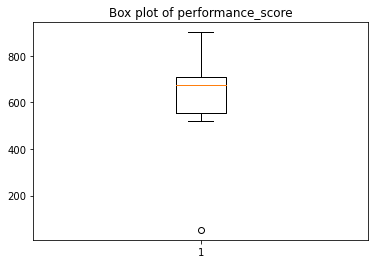

In [23]:
# checking performance_score column
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance_score')

In [24]:
Q1 = np.percentile(data['performance_score'], 25, interpolation='midpoint')
Q2 = np.percentile(data['performance_score'], 50, interpolation='midpoint')
Q3 = np.percentile(data['performance_score'], 75, interpolation='midpoint')

In [25]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [26]:
data['performance_score'].median()

674.0

In [37]:
IQR = Q3-Q1
IQR

155.0

In [28]:
lower_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

In [29]:
print(lower_limit)
print(up_limit)

323.5
943.5


In [30]:
# finding outliers
outlier =[]
for x in data['performance_score']:
    if((x>up_limit)or(x<lower_limit)):
        outlier.append(x)

In [31]:

outlier

[53]

In [87]:
# finding index of outliers
ind1 = data['performance_score']>up_limit
data.loc[ind1].index

Index([], dtype='object', name='name')

In [33]:
ind2 = data['performance_score']<lower_limit
data.loc[ind2].index

Index(['James Authur'], dtype='object', name='name')

In [34]:
#removing outliers
data.drop(['James Authur'],inplace=True)

In [35]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


Text(0.5, 1.0, 'Box plot of performance_score')

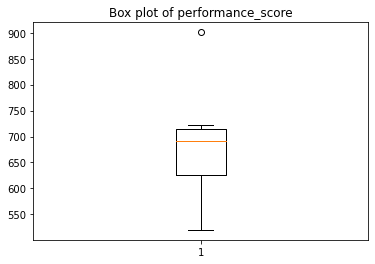

In [36]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance_score')

# 9. Check the gender column and do Dummy encoding.

In [21]:
data.gender.nunique()

2

In [ ]:
#Dummy encoding.

In [38]:
data1 =pd.get_dummies(data['gender'])
data1

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


# 10.Do the standard scaling on the feature performance score

In [23]:
x=data['performance_score']
x=pd.DataFrame(x)
type(x)

pandas.core.frame.DataFrame

In [24]:
from sklearn import preprocessing
standard_scaling= preprocessing.StandardScaler()
x=standard_scaling.fit_transform(x)

In [25]:
x=pd.DataFrame(x)
x

,0
0,0.505565
1,-0.408053
2,0.285037
3,-0.246032
4,0.451558
5,0.172522
6,-2.509823
7,1.306668
8,0.442557
